In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold

import warnings
warnings.filterwarnings('ignore')


In [2]:
from google.colab import files
uploaded = files.upload()

Saving glass.csv to glass.csv


In [4]:
glass = pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.shape

(214, 10)

In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [ ]:
glass.isnull().any()

RI      False
Na      False
Mg      False
Al      False
Si      False
K       False
Ca      False
Ba      False
Fe      False
Type    False
dtype: bool

In [ ]:
glass[glass.duplicated()].sum()

RI       1.52213
Na      14.21000
Mg       3.82000
Al       0.47000
Si      71.77000
K        0.11000
Ca       9.57000
Ba       0.00000
Fe       0.00000
Type     1.00000
dtype: float64

In [ ]:
glass[glass.duplicated()].shape

(1, 10)

In [ ]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [ ]:
glass.drop_duplicates()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [ ]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [ ]:
glass["Type"].unique()

array([1, 2, 3, 5, 6, 7])

In [ ]:
glass['Type'].value_counts().sort_index(ascending=True)

1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

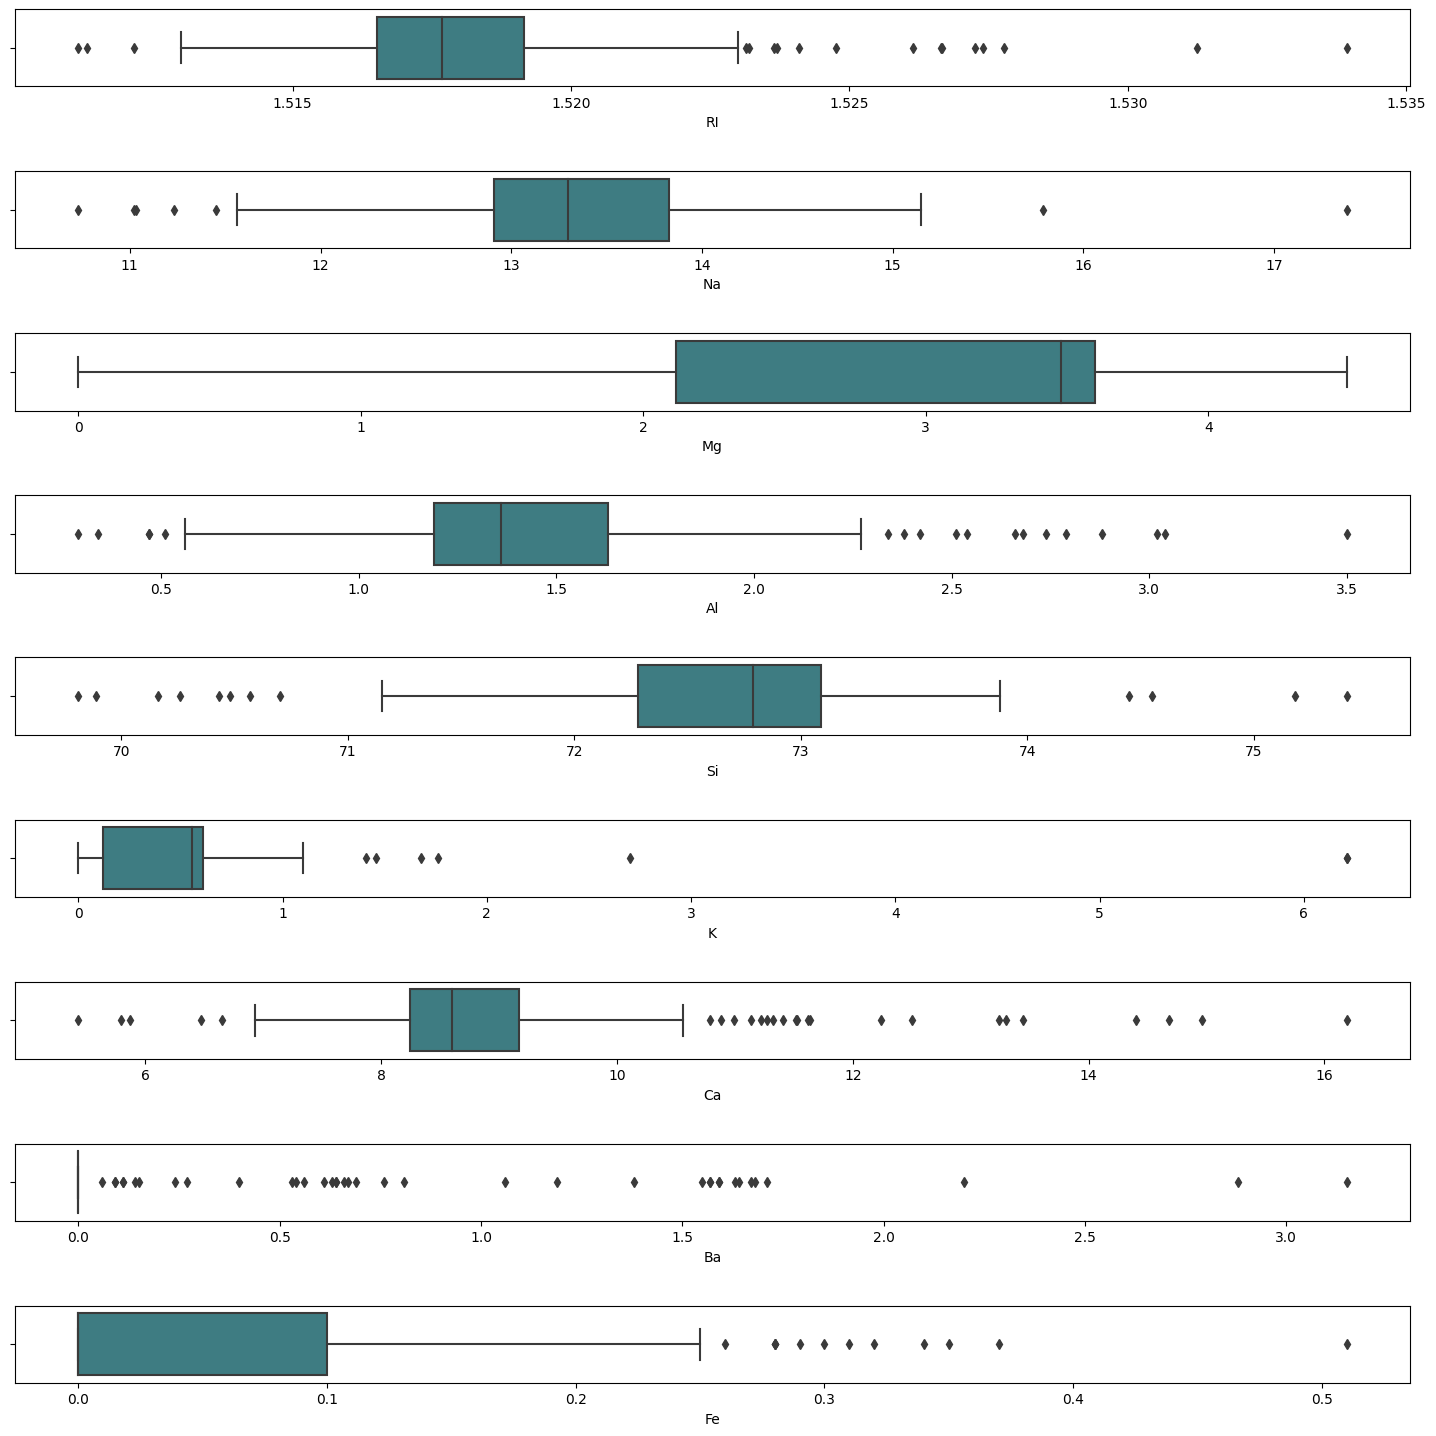

In [ ]:
Outliers = glass.copy()
fig,axes = plt.subplots(9,1,figsize=(15,15),sharex=False, sharey=False)
sns.boxplot(x='RI',data = Outliers, palette = 'crest', ax=axes[0])
sns.boxplot(x='Na',data = Outliers, palette = 'crest', ax=axes[1])
sns.boxplot(x='Mg',data = Outliers, palette = 'crest', ax=axes[2])
sns.boxplot(x='Al',data = Outliers, palette = 'crest', ax=axes[3])
sns.boxplot(x='Si',data = Outliers, palette = 'crest', ax=axes[4])
sns.boxplot(x='K',data = Outliers, palette = 'crest', ax=axes[5])
sns.boxplot(x='Ca',data = Outliers, palette = 'crest', ax=axes[6])
sns.boxplot(x='Ba',data = Outliers, palette = 'crest', ax=axes[7])
sns.boxplot(x='Fe',data = Outliers, palette = 'crest', ax=axes[8])
plt.tight_layout(pad=3.0)

<Axes: >

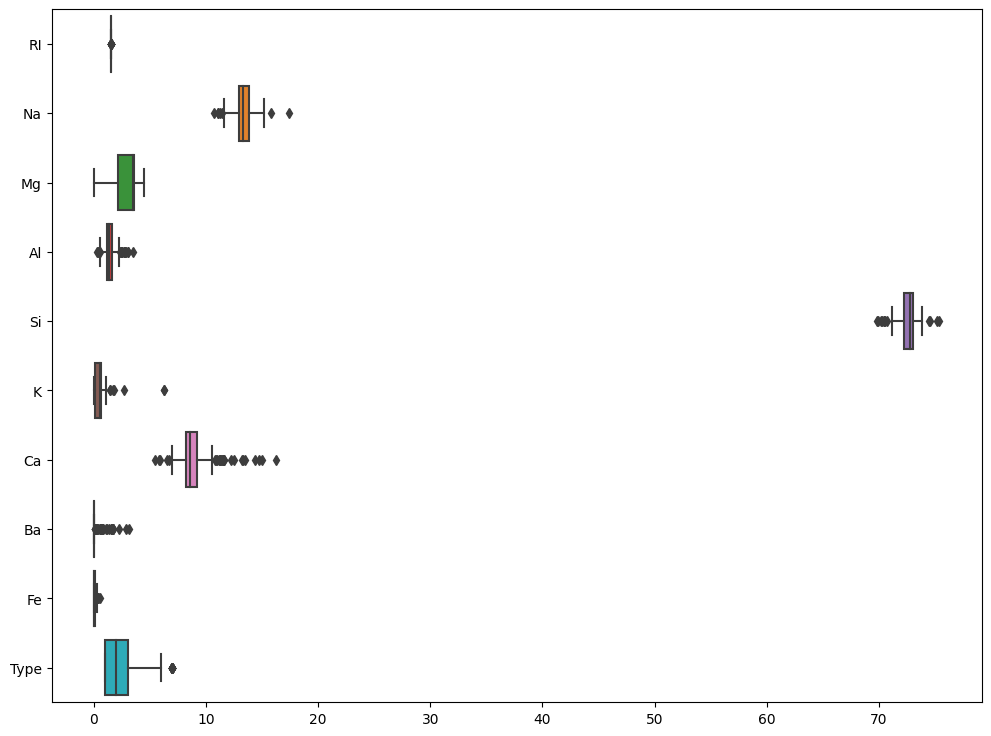

In [ ]:
plt.figure(figsize=(12,9))
sns.boxplot(data=glass, orient = 'horizontal')

# **Multivariate Analysis**

<Axes: >

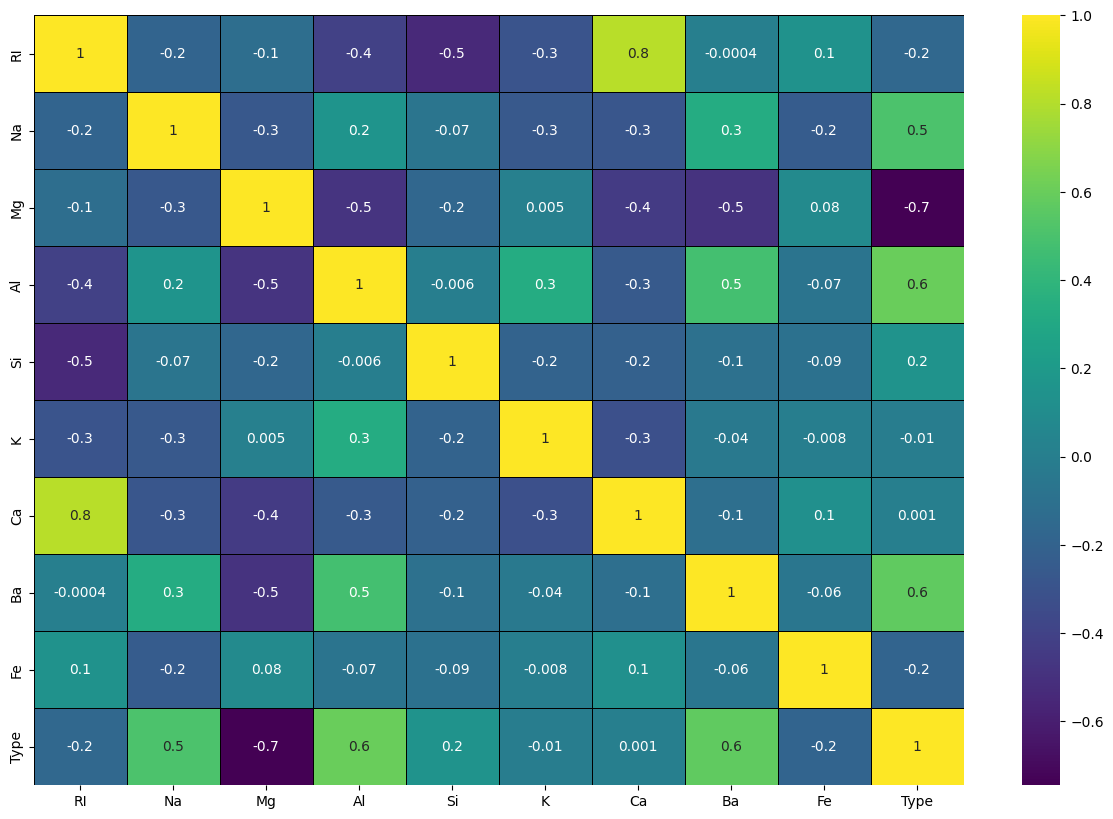

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(glass.corr(), annot =True, fmt='.1g', cmap='viridis', linewidths=0.5,linecolor = 'black')

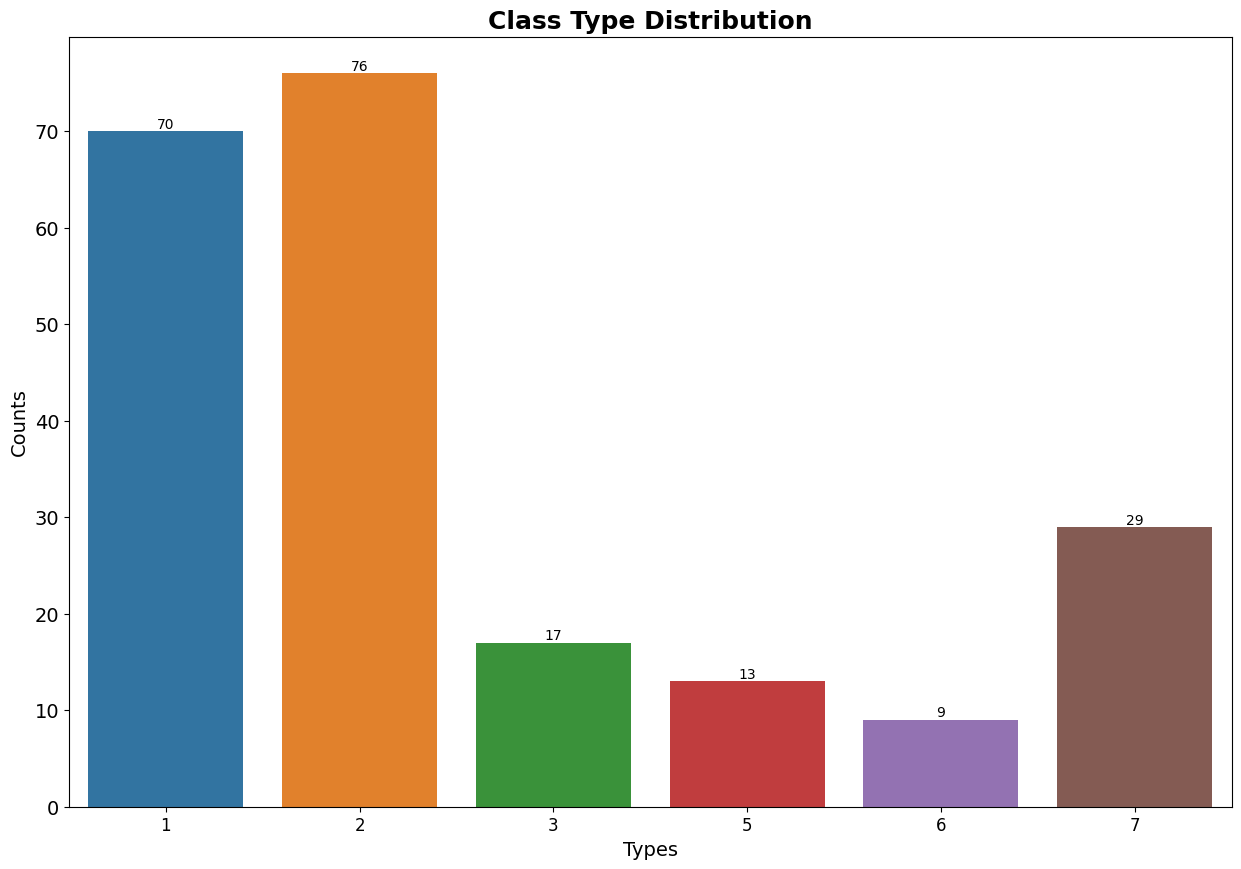

In [ ]:
plt.figure(figsize=(15,10))
ax = sns.barplot(x=glass['Type'].value_counts().index.tolist(), y=glass['Type'].value_counts().tolist())
plt.yticks(fontsize= 14)
plt.xticks(fontsize= 12)
plt.title("Class Type Distribution", fontsize=18, fontweight='bold')
plt.xlabel('Types',fontsize= 14)
plt.ylabel('Counts', fontsize = 14)
for i in ax.containers:
    ax.bar_label(i,)

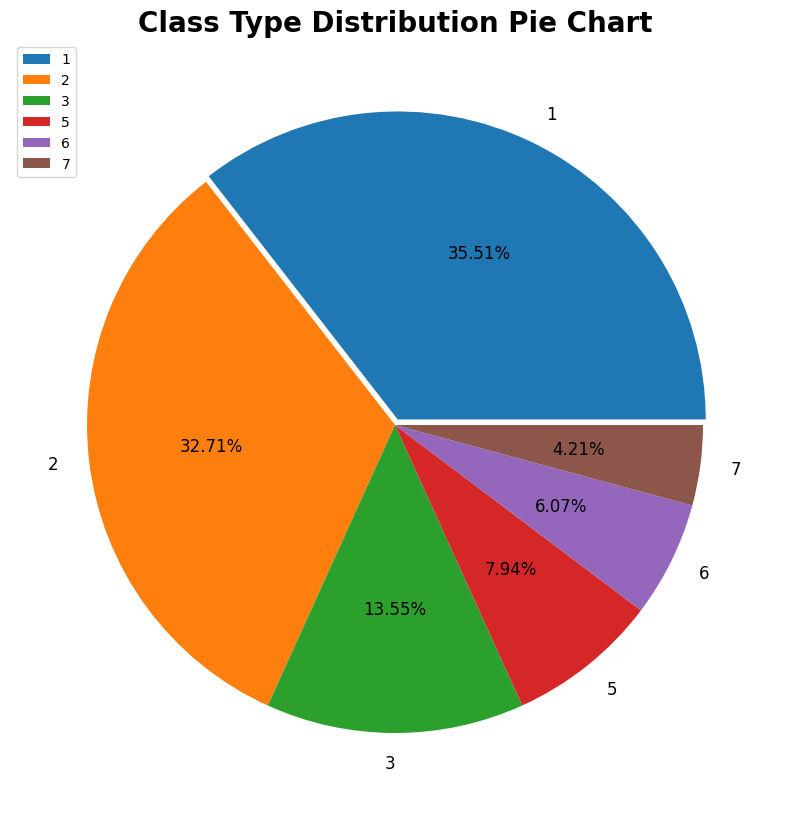

In [5]:
plt.figure(figsize=(10,10))
plt.pie(glass['Type'].value_counts(),
        labels = glass.Type.unique(), explode = [0.02, 0.0, 0.0, 0.0, 0.0, 0.0],
        autopct = '%.2f%%', textprops = {'size':'large'})
plt.legend(loc='upper left')
plt.title("Class Type Distribution Pie Chart",fontsize = 20, fontweight = 'bold')
plt.show()

In [6]:
#Data PreProcessing and Removing Multiple Outliers

features = glass.columns[:-1].tolist()
def outliers_hunt(df):
    outlier_indices = []

    #iterate over features
    for col in df.columns.tolist():
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3-Q1
        Outlier_step = 1.5* IQR

    #List of Indices of Outliers for feature col
        Outliers_list_col = df[(df[col] < Q1 - Outlier_step) | (df[col] > Q3 + Outlier_step)].index

    #The Found Outlier Indices For Col To The List Of Outlier Indices
        outlier_indices.extend(Outliers_list_col)
    
    # Select Observations Containing More Than 2 Outliers
        outlier_indices = Counter(outlier_indices)        
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

        return multiple_outliers

        print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features])))) 


In [7]:
outlier_indices = outliers_hunt(glass[features])
df = glass.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()

(214, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


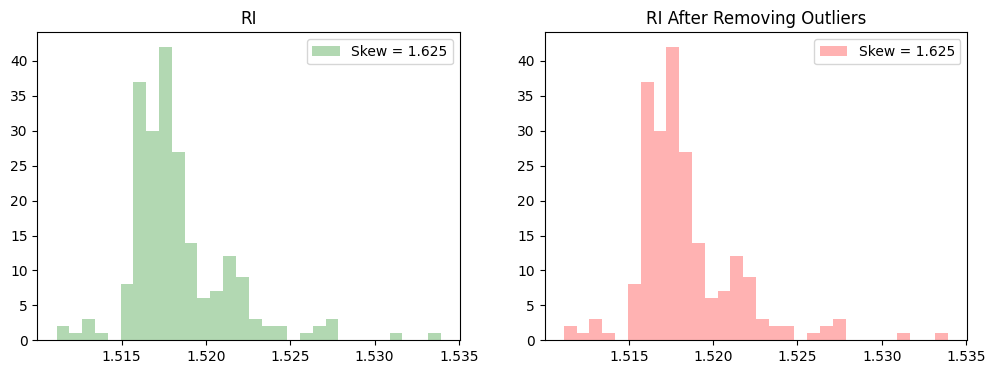

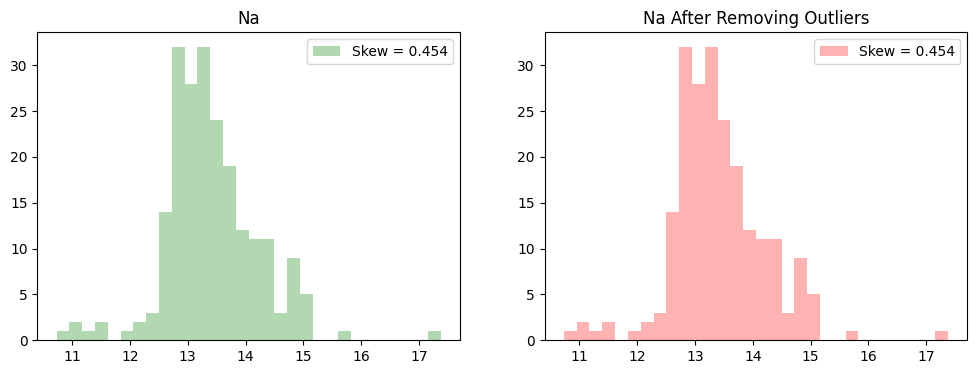

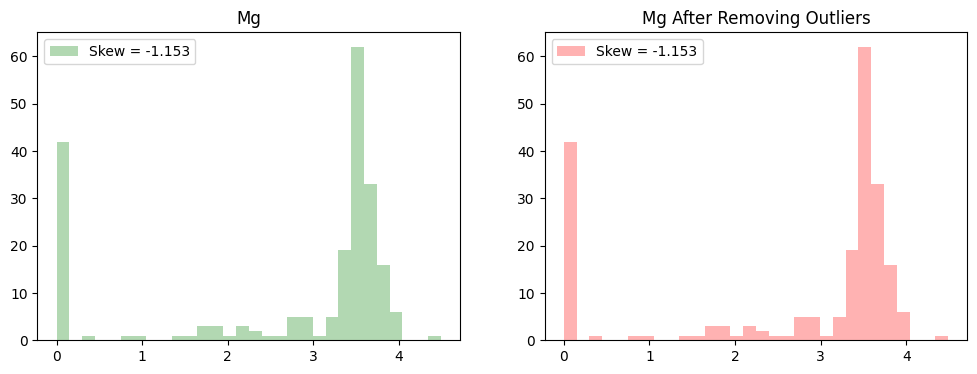

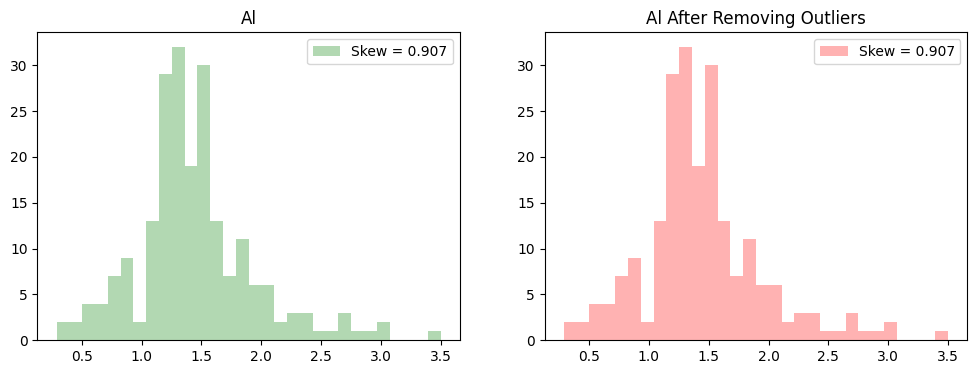

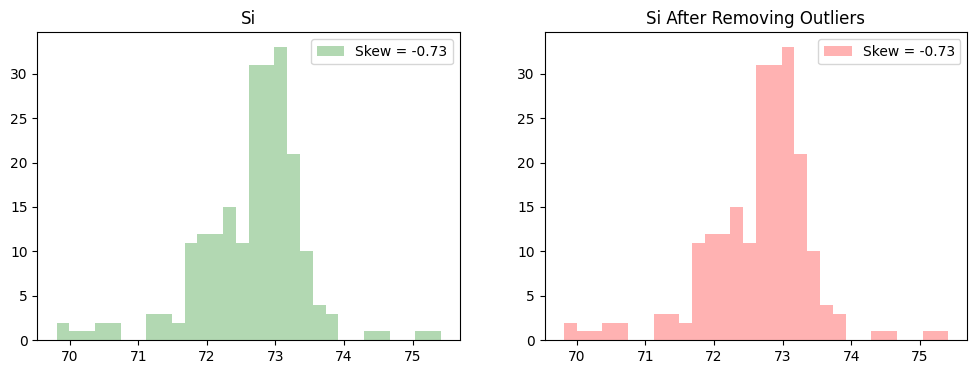

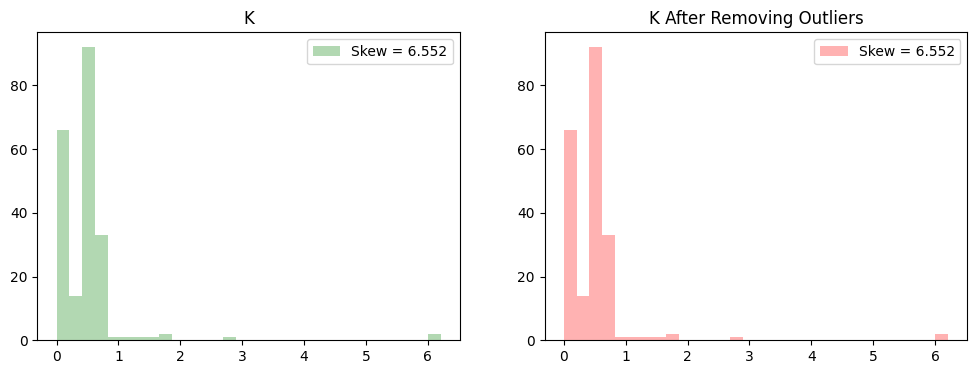

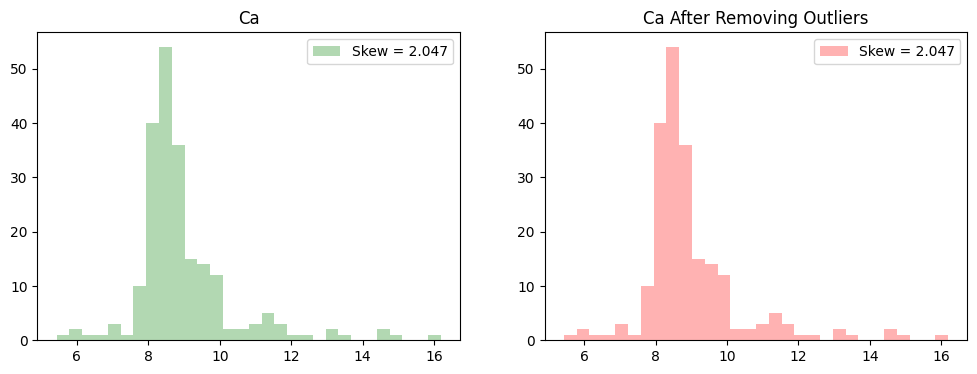

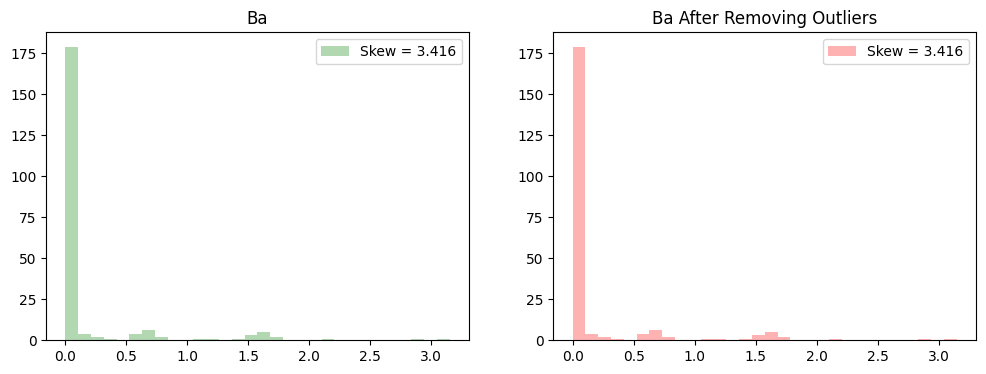

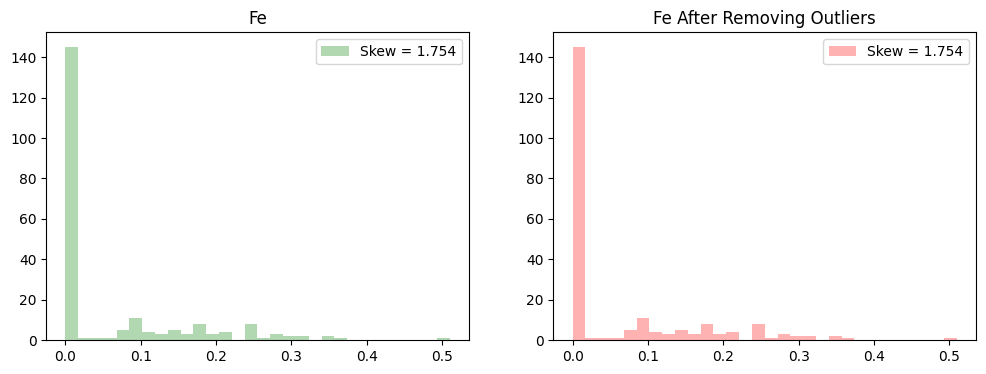

In [8]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(12,4))    
    ax[0].hist(glass[feature], color='green', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glass[feature].skew(),3))))
    ax[0].set_title(str(feature))   
    ax[0].legend(loc=0)
    
    ax[1].hist(df[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))))
    ax[1].set_title(str(feature)+' After Removing Outliers')
    ax[1].legend(loc=0)
    plt.show()

## **Train_Test Split**

In [9]:
X = df.drop('Type', axis=1)
y = df[['Type']]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [31]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (171, 9)
Shape of X_test  :  (43, 9)
Shape of y_train :  (171, 1)
Shape of y_test  :  (43, 1)


In [12]:
#Standardize_Variable

std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [32]:
# Get score for different values of n

k_list = np.arange(1, 43, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(43,1)
    score = cross_val_score(knn,X_train, y_train,cv= 10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [33]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [34]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [35]:
print(grid.best_score_)
print(grid.best_params_)

0.6502164502164502
{'n_neighbors': 3}


## **Visualization**

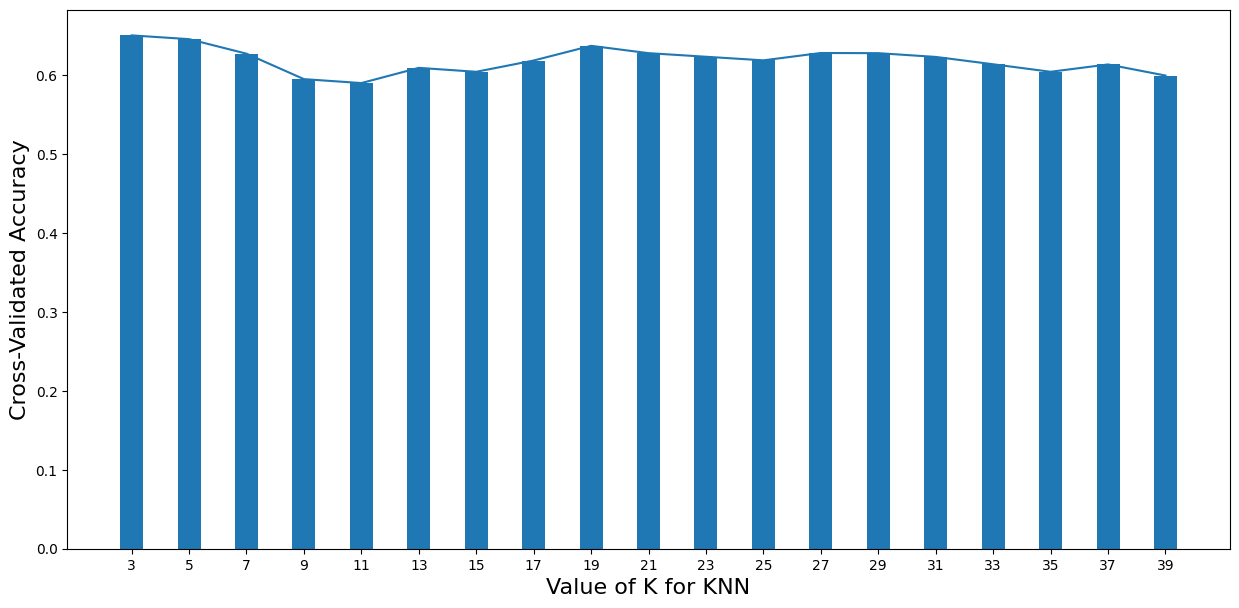

In [37]:
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

# use iteration to caclulate different k in models, return average accuracy based on cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y, cv= 10)
    k_scores.append(scores.mean())

plt.figure(figsize=(15,7))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN', fontsize = 16)
plt.ylabel('Cross-Validated Accuracy', fontsize = 16)
plt.xticks(k_range)
plt.show()

In [38]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head()

,0
0,0.650216
1,0.645455
8,0.637013
12,0.627922
13,0.627706


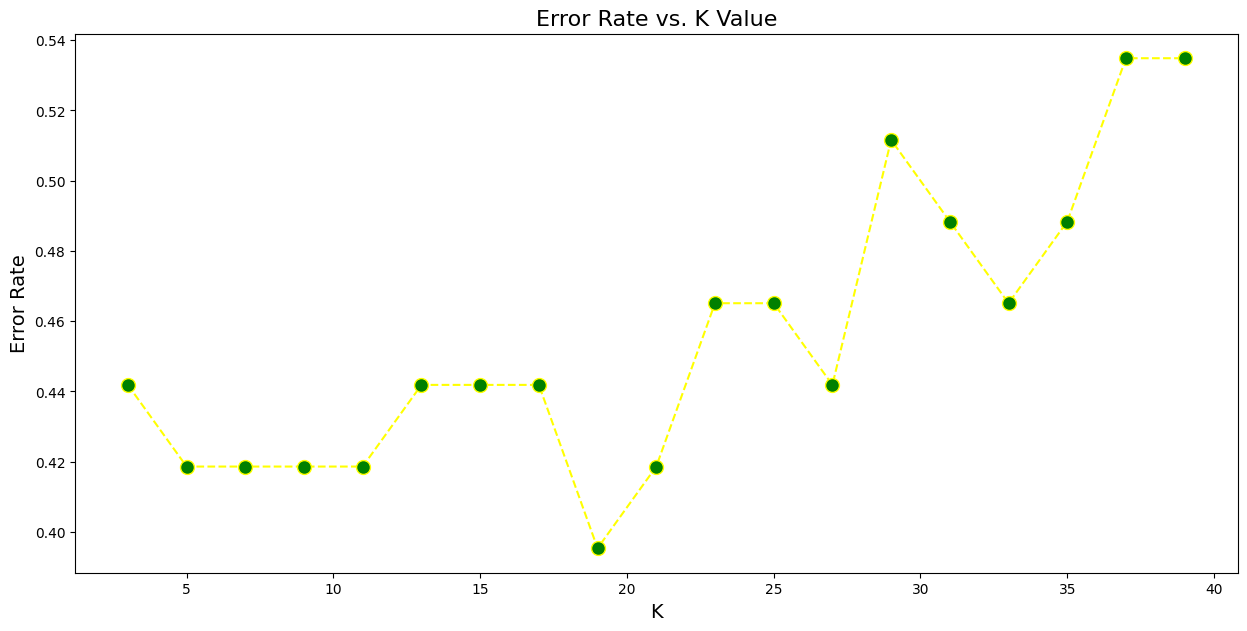

In [42]:
error_rate = []
k_range = [i for i in range(3,40, 2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(43,1)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(15,7))
plt.plot([i for i in range(3,40,2)],error_rate,color='yellow', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
plt.title('Error Rate vs. K Value', fontsize = 16)
plt.xlabel('K', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

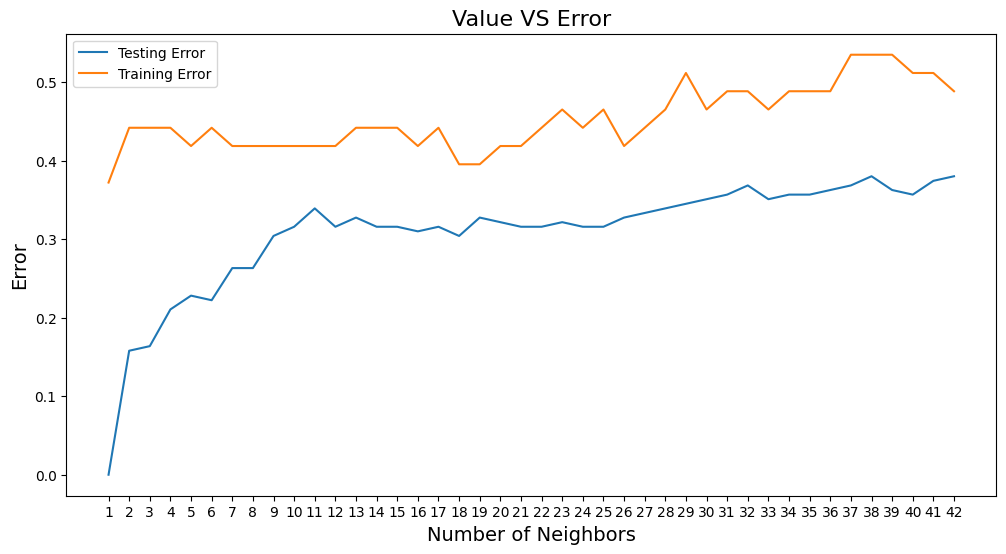

In [56]:
error1= []
error2= []
k_range = [i for i in range(1,43)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred1= knn.predict(X_train)
    y_pred1 = y_pred1.reshape(171,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(X_test)
    y_pred2 = y_pred2.reshape(43,1)
    error2.append(np.mean(y_test!= y_pred2))

plt.figure(figsize=[12,6])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('Value VS Error', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Error', fontsize = 14)
plt.xticks(k_range)
plt.show()

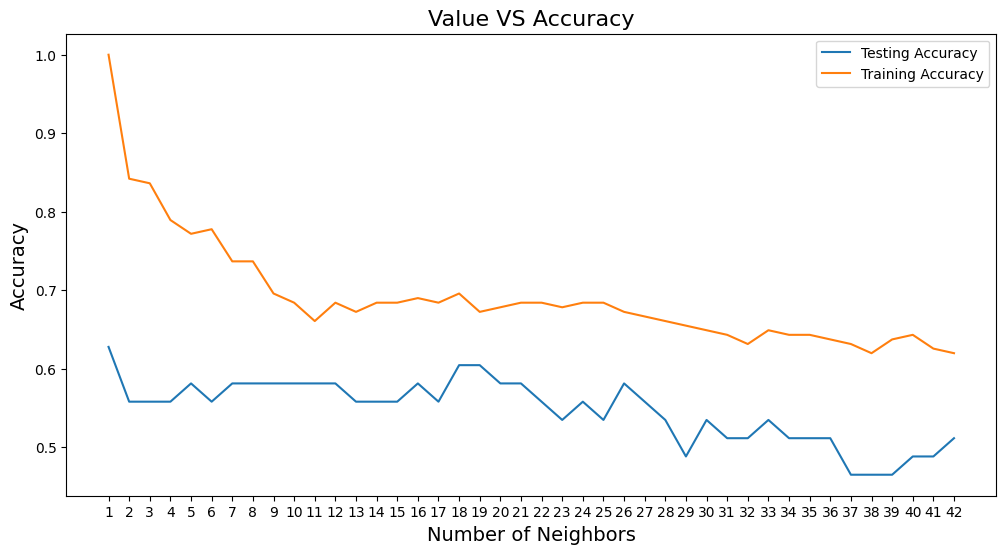

In [57]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,43)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

## **KNN = 3**

In [58]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=3


[[ 5  3  1  0  0  0]
 [ 8 11  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  1  1]
 [ 1  0  0  0  0  5]]


              precision    recall  f1-score   support

           1       0.26      0.56      0.36         9
           2       0.79      0.58      0.67        19
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.83      0.83      0.83         6

    accuracy                           0.56        43
   macro avg       0.65      0.58      0.59        43
weighted avg       0.61      0.56      0.56        43



# KNN = **5**

In [59]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=5


[[ 6  3  0  0  0  0]
 [ 7 12  0  0  0  0]
 [ 5  0  0  0  0  0]
 [ 0  1  0  1  0  0]
 [ 0  1  0  0  1  0]
 [ 1  0  0  0  0  5]]


              precision    recall  f1-score   support

           1       0.32      0.67      0.43         9
           2       0.71      0.63      0.67        19
           3       0.00      0.00      0.00         5
           5       1.00      0.50      0.67         2
           6       1.00      0.50      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.58        43
   macro avg       0.67      0.52      0.56        43
weighted avg       0.61      0.58      0.57        43



## **K-Nearest Neighbours(KNN)**

In [60]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [('model', KNeighborsClassifier())]
knn_pipe = Pipeline(steps)

In [61]:
parameters = {'model__algorithm' : ['brute'], 'model__leaf_size' : [30,50,70,90,110],
              'model__metric' : ['minkowski'], 'model__p' : [1], 'model__n_neighbors' : [3,5,7,9],
              'model__weights' : ['uniform', 'distance'], 'model__n_jobs' : [-1]}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv= 10)
classifier_knn = classifier_knn.fit(X_train, y_train.values.ravel())

In [62]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training Accuracy :", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Testing Accuracy  :", accuracy_knn_test)

Training Accuracy : 1.0
Testing Accuracy  : 0.6511627906976745
